In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db = sqlite3.connect('_data/movie.sqlite')
cur = db.cursor()

In [3]:
cur.execute('SELECT * FROM movies')
movies = cur.fetchall()

In [7]:
mv_df = pd.read_sql_query('SELECT * FROM movies', db)

In [9]:
dr_df = pd.read_sql_query('SELECT * FROM directors', db)

In [10]:
dr_df

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing
...,...,...,...,...,...
2344,Shane Carruth,7106,2,76624,Directing
2345,Neill Dela Llana,7107,0,1174437,Directing
2346,Scott Smith,7108,0,1219158,Directing
2347,Daniel Hsia,7109,2,208138,Directing


In [11]:
mv_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485
4770,48397,"Signed, Sealed, Delivered",0,1,2013-10-13,0,"Signed, Sealed, Delivered",7.0,6,"""Signed, Sealed, Delivered"" introduces a dedic...",None,231617,7108
4771,48398,Shanghai Calling,0,0,2012-05-03,0,Shanghai Calling,5.7,7,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,126186,7109


In [12]:
mv_df.columns

Index(['id', 'original_title', 'budget', 'popularity', 'release_date',
       'revenue', 'title', 'vote_average', 'vote_count', 'overview', 'tagline',
       'uid', 'director_id'],
      dtype='object')

In [14]:
cur.execute('SELECT COUNT (*) FROM movies')
count = cur.fetchall()
print(count[0][0])

4773


In [15]:
cur.execute('SELECT COUNT (*) FROM movies')
count = cur.fetchall()
print(count[0][0])

[(4773,)]

In [18]:
pd.read_sql_query('SELECT * FROM directors WHERE name LIKE "Steven%" ORDER by uid', db)

,name,id,gender,uid,department
0,Steven Spielberg,4799,2,488,Directing
1,Steven E. de Souza,5390,2,1726,Directing
2,Steven Soderbergh,4909,2,1884,Directing
3,Steven Zaillian,5117,2,2260,Directing
4,Steven Seagal,5221,2,23880,Directing
5,Steven Brill,5013,2,32593,Directing
6,Steven Shainberg,5803,2,67795,Directing
7,Steven R. Monroe,6713,2,88039,Directing
8,Steven Quale,5216,2,93214,Directing


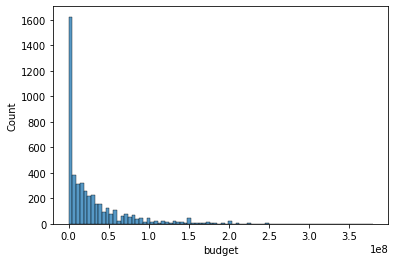

In [23]:
sns.histplot(mv_df.budget);

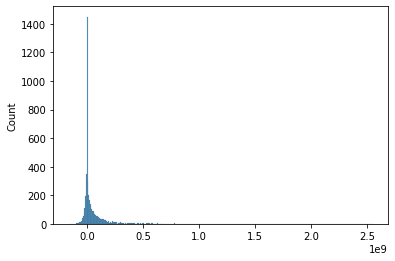

In [24]:
sns.histplot(mv_df.revenue - mv_df.budget );

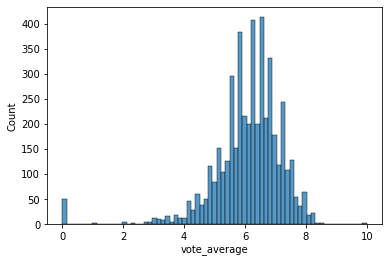

In [26]:
sns.histplot(mv_df.vote_average);

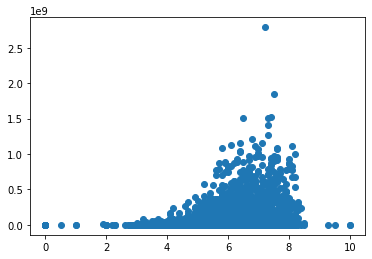

In [28]:
plt.scatter(mv_df.vote_average, mv_df.revenue);